# Video processing

In this notebook, we provide a tutorial of how to properly call the functions build to process various biofilm growth videos. This includes

- Loading video frames
- Extracting the wrinkle class over time
- Computing the evolution of percentage of wrinkle area over time
- Computing the number of spokes present in the biofilm, the medium length of the spokes and the medium distance of the spokes from the center over time
- Computing the average distance from spokes to the center of the biofilm over time

You will find all the necessary functions in the `.py` file `video_processing_functions.py`



In [1]:
# Additional python packages
import os, urllib, io, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import cv2
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
import  image_processing_functions as img
import  video_processing_functions as vid
# Our functions

## Loading video frames

In [2]:
cap = cv2.VideoCapture('../../Data/movies/180918 (Converted).mov')

In [3]:
cap         = cv2.VideoCapture('../../Data/movies/180918 (Converted).mov')
frameCount  = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
X           = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
fc          = 0
ret         = True

while (fc < frameCount  and ret):
    ret, X[fc] = cap.read()
    fc += 1

In [4]:
# cropping for video 180918.mov
cropped_left_180918 = [x[450:700,450:700] for x in X]
cropped_right_180918 = [x[450:700,1100:1350] for x in X]

In [5]:
# cropping for video 181129.avi
cropped_left_181129 = [x[655:865,520:730] for x in X[2:]]
cropped_right_181129 = [x[695:905,1240:1450] for x in X[2:]]

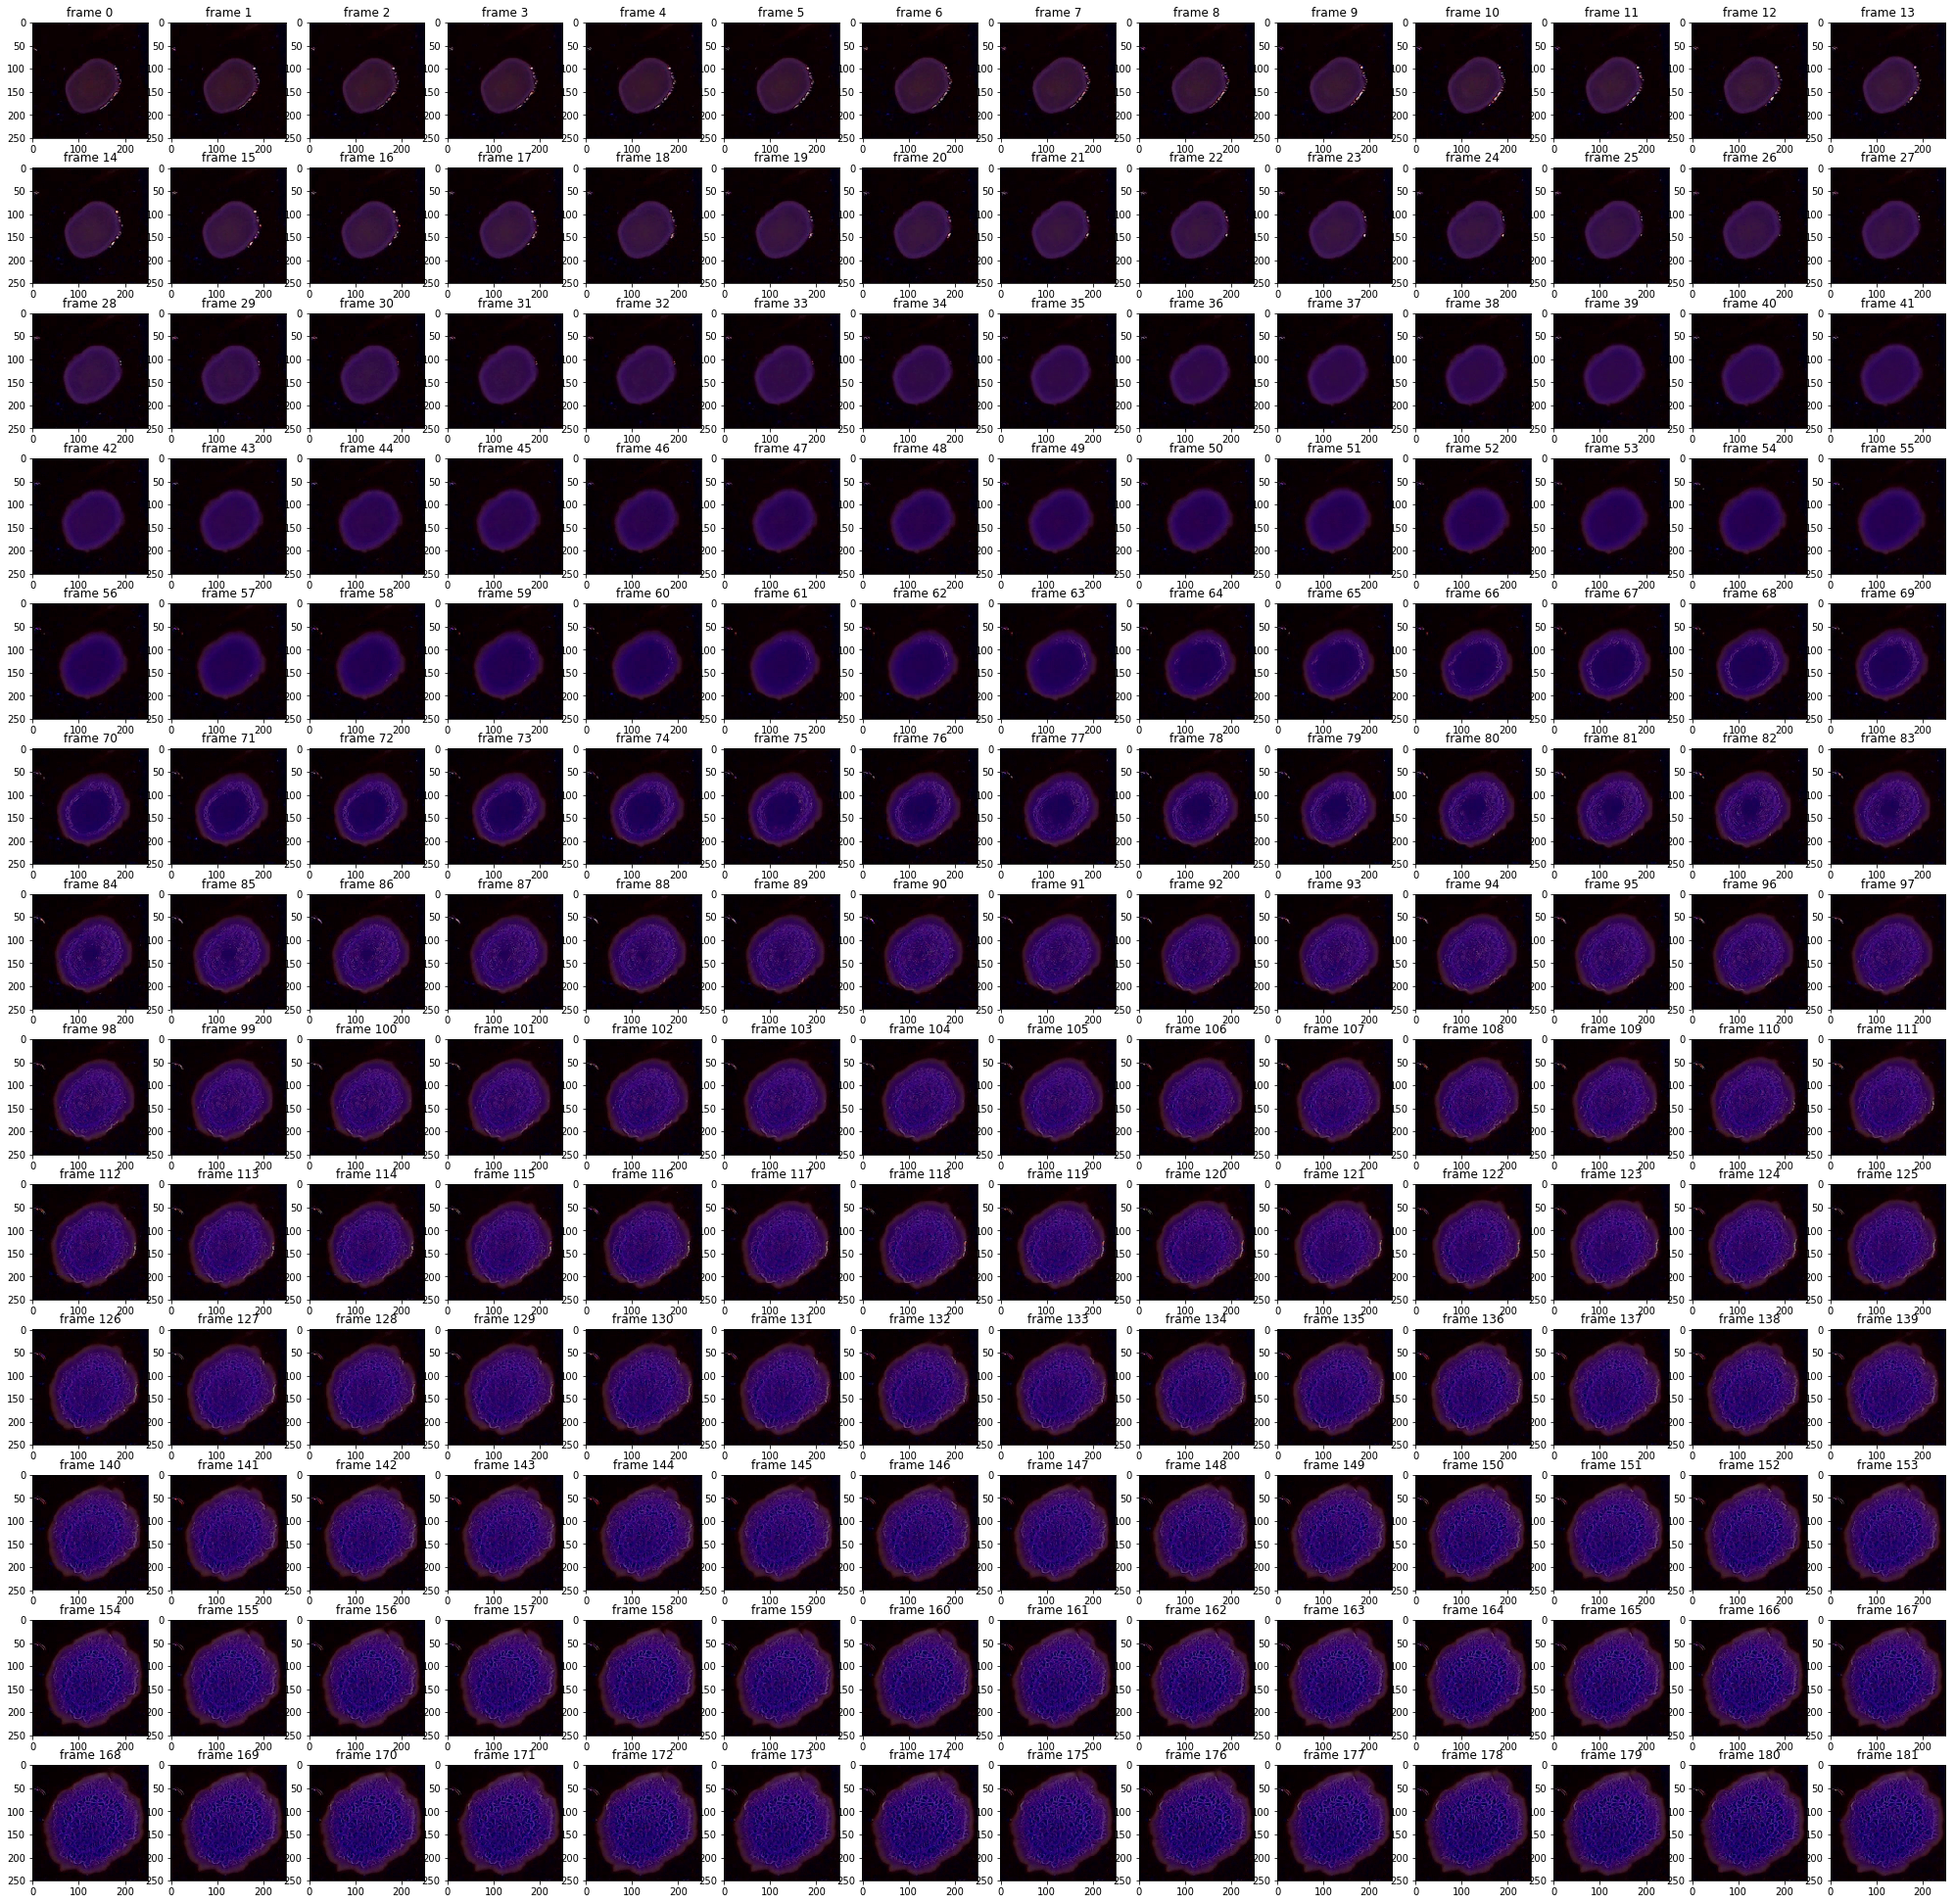

In [34]:
f, axarr = plt.subplots(13, 14, figsize = (35,35))
k = 0
for i in range(13) :
    for j in range(14) :
        axarr[i,j].imshow(images[k])
        axarr[i,j].set_title('frame {}'.format(k))
        k += 1

In [7]:
images = cropped_right_180918
output = []
pw_list = []

for i, a in enumerate(images):
    bf_m = vid.bf_size(a)
    t = vid.threshold_image(a, threshold_val=0)
    output.append(t)
    pw_list.append(img.perc_wrinkled(t,bf_m))
    cv2.imwrite("video/frames/frame%d.jpg" % i, t)

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:76: RuntimeWarning:

divide by zero encountered in true_divide

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:76: RuntimeWarning:

invalid value encountered in true_divide

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:76: RuntimeWarning:

invalid value encountered in less

/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/Final_github_file/image_processing_functions.py:76: RuntimeWarning:

invalid value encountered in greater



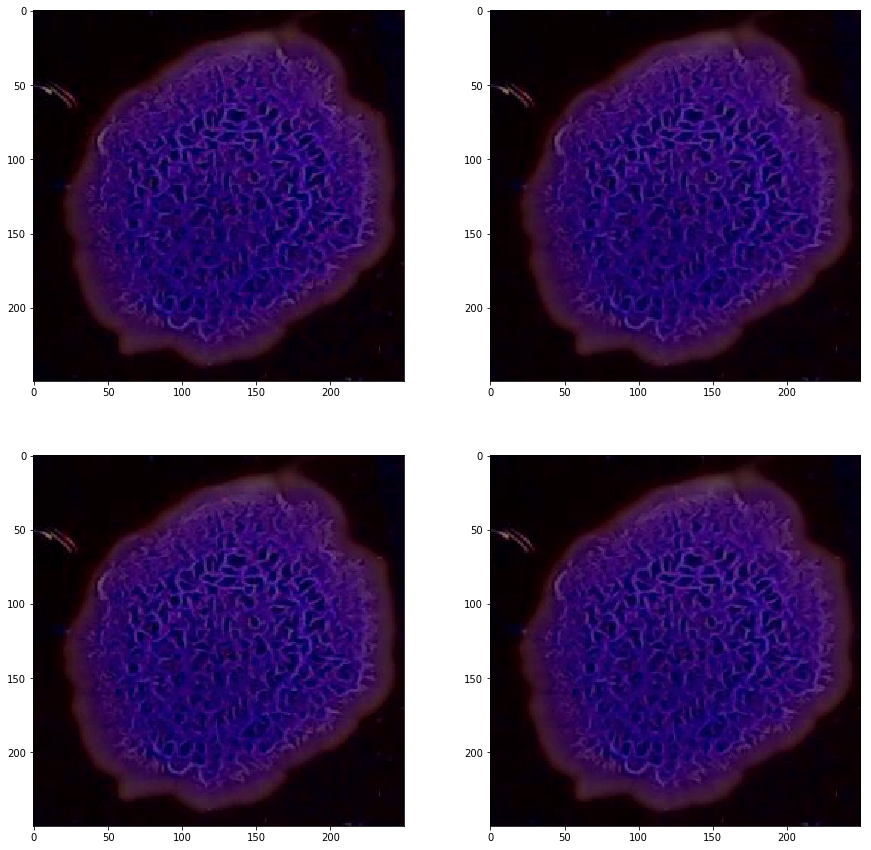

In [8]:
fig = plt.figure(figsize=(15,15))
n = 2

for i,s in enumerate(output[180:186]):
    try:
        fig.add_subplot(n,n,i+1)
        plt.imshow(s)
        title = 'gene: %s | day %d' %(df_all['gene'][i],df_all['days'][i])
        plt.title(title)
    except:
        pass
plt.show()

In [18]:
plt.imshow(img.get_wrinkles(t, resize = 500, movie = True, background_is_black = True)[1])

AttributeError: 'Image' object has no attribute 'shape'